In [1]:
import cv2
import pandas as pd
import numpy as np
import glob
import os
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.models import load_model
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
import datetime
import json
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# # for glob.glob('../data/raw/105_classes_pins_dataset/*')[0].split('\\')[-1]
# # %%time

# img_list = []
# label_list = []
# most = 225

# datagen = ImageDataGenerator(horizontal_flip=True,
#                                      rotation_range=15,
#                                     )

# for dir in glob.glob('../data/raw/105_classes_pins_dataset/*')[:30]:
#     label = dir.split('\\')[-1]
#     count = 0

#     paths = glob.glob(f"{dir}/*")
#     num_image = len(paths)

#     for path in paths:
#         pict_name = path.split('\\')[-1]

#         img = cv2.imread(path)
#         img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#         img = cv2.resize(img, (224,224))


#         img_list.append(img)
#         label_list.append(label)
#         count += 1
        
#         img = img.reshape((1, ) + img.shape)  

#         if not os.path.exists(f'../data/processed/105_classes_pins_dataset/{label}'):
#             os.makedirs(f'../data/processed/105_classes_pins_dataset/{label}')

#         generator =  datagen.flow(img, batch_size = 1, 
#                       save_to_dir =f'../data/processed/105_classes_pins_dataset/{label}',  shuffle=False,
#                       save_prefix =f'{pict_name}_aug', save_format ='jpeg')
        
#         generator.reset()
#         for i in range(generator.__len__()):
#             a=generator.next()
#             a = a.reshape(224, 224, 3)
#             img_list.append(a)
#             label_list.append(label)
#             count += 1

        
    
#     print(f'{label}: {count}')


# img_list = np.array(img_list)
# label_list = np.array(label_list)




In [2]:
# for glob.glob('../data/raw/105_classes_pins_dataset/*')[0].split('\\')[-1]
# %%time

img_list = []
label_list = []

for dir in glob.glob('../data/raw/105_classes_pins_dataset/*')[:30]:
    label = dir.split('\\')[-1]
    count = 0

    paths = glob.glob(f"{dir}/*")

    for path in paths:
        pict_name = path.split('\\')[-1]

        img = cv2.imread(path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        img = cv2.resize(img, (224,224))


        img_list.append(img)
        label_list.append(label)
        count += 1
        
    dir = dir.replace('raw', 'processed')
    paths = glob.glob(f"{dir}/*")
    for path in paths:
        pict_name = path.split('\\')[-1]

        img = cv2.imread(path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        img = cv2.resize(img, (224,224))


        img_list.append(img)
        label_list.append(label)
        count += 1

        
    
    print(f'{label}: {count}')

img_list = np.array(img_list)
label_list = np.array(label_list)




pins_Adriana Lima: 639
pins_Alex Lawther: 456
pins_Alexandra Daddario: 675
pins_Alvaro Morte: 417
pins_alycia dabnem carey: 633
pins_Amanda Crew: 351
pins_amber heard: 654
pins_Andy Samberg: 588
pins_Anne Hathaway: 609
pins_Anthony Mackie: 372
pins_Avril Lavigne: 486
pins_barack obama: 357
pins_barbara palvin: 591
pins_Ben Affleck: 378
pins_Bill Gates: 366
pins_Bobby Morley: 414
pins_Brenton Thwaites: 627
pins_Brian J. Smith: 306
pins_Brie Larson: 507
pins_camila mendes: 486
pins_Chris Evans: 498
pins_Chris Hemsworth: 477
pins_Chris Pratt: 528
pins_Christian Bale: 462
pins_Cristiano Ronaldo: 294
pins_Danielle Panabaker: 543
pins_Dominic Purcell: 438
pins_Dwayne Johnson: 423
pins_Eliza Taylor: 485
pins_Elizabeth Lail: 474


In [3]:
print(img_list.shape)
print(label_list.shape)

(14534, 224, 224, 3)
(14534,)


In [4]:
# Assume y is your target labels
encoder = OneHotEncoder(sparse_output=False)
label_one_hot = encoder.fit_transform(label_list.reshape(-1, 1))

In [5]:
label_one_hot

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [6]:
categories_ = encoder.categories_[0]
# encoder.categories_[0][label_one_hot[0].argmax()]
categories_

array(['pins_Adriana Lima', 'pins_Alex Lawther',
       'pins_Alexandra Daddario', 'pins_Alvaro Morte', 'pins_Amanda Crew',
       'pins_Andy Samberg', 'pins_Anne Hathaway', 'pins_Anthony Mackie',
       'pins_Avril Lavigne', 'pins_Ben Affleck', 'pins_Bill Gates',
       'pins_Bobby Morley', 'pins_Brenton Thwaites',
       'pins_Brian J. Smith', 'pins_Brie Larson', 'pins_Chris Evans',
       'pins_Chris Hemsworth', 'pins_Chris Pratt', 'pins_Christian Bale',
       'pins_Cristiano Ronaldo', 'pins_Danielle Panabaker',
       'pins_Dominic Purcell', 'pins_Dwayne Johnson', 'pins_Eliza Taylor',
       'pins_Elizabeth Lail', 'pins_alycia dabnem carey',
       'pins_amber heard', 'pins_barack obama', 'pins_barbara palvin',
       'pins_camila mendes'], dtype='<U24')

In [9]:
X_train, X_test, y_train, y_test = train_test_split(img_list, label_one_hot, test_size=1/3, random_state=42)

In [10]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6460, 224, 224, 3)
(3230, 224, 224, 3)
(6460, 30)
(3230, 30)


In [51]:
# Load pre-trained EfficientNetB0 model
base_model = EfficientNetB0(include_top=False, input_shape=(224, 224, 3))

# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add new output layer with 10 outputs
x = base_model.output
x = GlobalAveragePooling2D()(x)
predictions = Dense(30, activation='softmax')(x)

# Create new model
model = Model(inputs=base_model.input, outputs=predictions)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_3 (Rescaling)        (None, 224, 224, 3)  0           ['input_4[0][0]']                
                                                                                                  
 normalization_3 (Normalization  (None, 224, 224, 3)  7          ['rescaling_3[0][0]']            
 )                                                                                                
                                                                                            

In [54]:
earlyStopping = EarlyStopping(monitor='val_loss', patience=5, verbose=0, mode='min')
mcp_save = ModelCheckpoint('../models/checkpoint', save_best_only=True, monitor='val_accuracy', mode='max')
reduce_lr_loss = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=7, verbose=1, epsilon=1e-4, mode='min')

history = model.fit(X_train, y_train, validation_data=[X_test, y_test], callbacks=[earlyStopping, mcp_save, reduce_lr_loss,], epochs=20)

Epoch 1/20
202/202 [==============================] - ETA: 0s - loss: 2.4166 - accuracy: 0.3164

INFO:tensorflow:Assets written to: ../models\checkpoint\assets


INFO:tensorflow:Assets written to: ../models\checkpoint\assets


202/202 [==============================] - 766s 4s/step - loss: 2.4166 - accuracy: 0.3164 - val_loss: 1.9194 - val_accuracy: 0.4724 - lr: 0.0010
Epoch 2/20
202/202 [==============================] - ETA: 0s - loss: 1.6743 - accuracy: 0.5607

INFO:tensorflow:Assets written to: ../models\checkpoint\assets


INFO:tensorflow:Assets written to: ../models\checkpoint\assets


202/202 [==============================] - 748s 4s/step - loss: 1.6743 - accuracy: 0.5607 - val_loss: 1.5854 - val_accuracy: 0.5641 - lr: 0.0010
Epoch 3/20
202/202 [==============================] - ETA: 0s - loss: 1.3781 - accuracy: 0.6433

INFO:tensorflow:Assets written to: ../models\checkpoint\assets


INFO:tensorflow:Assets written to: ../models\checkpoint\assets


202/202 [==============================] - 765s 4s/step - loss: 1.3781 - accuracy: 0.6433 - val_loss: 1.4010 - val_accuracy: 0.6080 - lr: 0.0010
Epoch 4/20
202/202 [==============================] - ETA: 0s - loss: 1.1912 - accuracy: 0.6958

INFO:tensorflow:Assets written to: ../models\checkpoint\assets


INFO:tensorflow:Assets written to: ../models\checkpoint\assets


202/202 [==============================] - 796s 4s/step - loss: 1.1912 - accuracy: 0.6958 - val_loss: 1.2969 - val_accuracy: 0.6365 - lr: 0.0010
Epoch 5/20
202/202 [==============================] - ETA: 0s - loss: 1.0599 - accuracy: 0.7375

INFO:tensorflow:Assets written to: ../models\checkpoint\assets


INFO:tensorflow:Assets written to: ../models\checkpoint\assets


202/202 [==============================] - 799s 4s/step - loss: 1.0599 - accuracy: 0.7375 - val_loss: 1.1993 - val_accuracy: 0.6610 - lr: 0.0010
Epoch 6/20
202/202 [==============================] - ETA: 0s - loss: 0.9521 - accuracy: 0.7706

INFO:tensorflow:Assets written to: ../models\checkpoint\assets


INFO:tensorflow:Assets written to: ../models\checkpoint\assets


202/202 [==============================] - 791s 4s/step - loss: 0.9521 - accuracy: 0.7706 - val_loss: 1.1221 - val_accuracy: 0.6805 - lr: 0.0010
Epoch 7/20
202/202 [==============================] - ETA: 0s - loss: 0.8772 - accuracy: 0.7887

INFO:tensorflow:Assets written to: ../models\checkpoint\assets


INFO:tensorflow:Assets written to: ../models\checkpoint\assets


202/202 [==============================] - 819s 4s/step - loss: 0.8772 - accuracy: 0.7887 - val_loss: 1.0695 - val_accuracy: 0.6994 - lr: 0.0010
Epoch 8/20
202/202 [==============================] - ETA: 0s - loss: 0.8104 - accuracy: 0.8046

INFO:tensorflow:Assets written to: ../models\checkpoint\assets


INFO:tensorflow:Assets written to: ../models\checkpoint\assets


202/202 [==============================] - 805s 4s/step - loss: 0.8104 - accuracy: 0.8046 - val_loss: 1.0193 - val_accuracy: 0.7167 - lr: 0.0010
Epoch 9/20
202/202 [==============================] - ETA: 0s - loss: 0.7501 - accuracy: 0.8285

INFO:tensorflow:Assets written to: ../models\checkpoint\assets


INFO:tensorflow:Assets written to: ../models\checkpoint\assets


202/202 [==============================] - 846s 4s/step - loss: 0.7501 - accuracy: 0.8285 - val_loss: 0.9740 - val_accuracy: 0.7235 - lr: 0.0010
Epoch 10/20
202/202 [==============================] - ETA: 0s - loss: 0.6963 - accuracy: 0.8396

INFO:tensorflow:Assets written to: ../models\checkpoint\assets


INFO:tensorflow:Assets written to: ../models\checkpoint\assets


202/202 [==============================] - 818s 4s/step - loss: 0.6963 - accuracy: 0.8396 - val_loss: 0.9450 - val_accuracy: 0.7334 - lr: 0.0010
Epoch 11/20
202/202 [==============================] - ETA: 0s - loss: 0.6535 - accuracy: 0.8508

INFO:tensorflow:Assets written to: ../models\checkpoint\assets


INFO:tensorflow:Assets written to: ../models\checkpoint\assets


202/202 [==============================] - 811s 4s/step - loss: 0.6535 - accuracy: 0.8508 - val_loss: 0.9153 - val_accuracy: 0.7337 - lr: 0.0010
Epoch 12/20
202/202 [==============================] - ETA: 0s - loss: 0.6124 - accuracy: 0.8615

INFO:tensorflow:Assets written to: ../models\checkpoint\assets


INFO:tensorflow:Assets written to: ../models\checkpoint\assets


202/202 [==============================] - 799s 4s/step - loss: 0.6124 - accuracy: 0.8615 - val_loss: 0.8827 - val_accuracy: 0.7430 - lr: 0.0010
Epoch 13/20
202/202 [==============================] - ETA: 0s - loss: 0.5752 - accuracy: 0.8748

INFO:tensorflow:Assets written to: ../models\checkpoint\assets


INFO:tensorflow:Assets written to: ../models\checkpoint\assets


202/202 [==============================] - 817s 4s/step - loss: 0.5752 - accuracy: 0.8748 - val_loss: 0.8535 - val_accuracy: 0.7619 - lr: 0.0010
Epoch 14/20
202/202 [==============================] - 714s 4s/step - loss: 0.5417 - accuracy: 0.8828 - val_loss: 0.8392 - val_accuracy: 0.7582 - lr: 0.0010
Epoch 15/20
202/202 [==============================] - ETA: 0s - loss: 0.5192 - accuracy: 0.8884

INFO:tensorflow:Assets written to: ../models\checkpoint\assets


INFO:tensorflow:Assets written to: ../models\checkpoint\assets


202/202 [==============================] - 804s 4s/step - loss: 0.5192 - accuracy: 0.8884 - val_loss: 0.8072 - val_accuracy: 0.7724 - lr: 0.0010
Epoch 16/20
202/202 [==============================] - 713s 4s/step - loss: 0.4930 - accuracy: 0.8977 - val_loss: 0.7858 - val_accuracy: 0.7721 - lr: 0.0010
Epoch 17/20
202/202 [==============================] - ETA: 0s - loss: 0.4696 - accuracy: 0.9012

INFO:tensorflow:Assets written to: ../models\checkpoint\assets


INFO:tensorflow:Assets written to: ../models\checkpoint\assets


202/202 [==============================] - 811s 4s/step - loss: 0.4696 - accuracy: 0.9012 - val_loss: 0.7701 - val_accuracy: 0.7780 - lr: 0.0010
Epoch 18/20
202/202 [==============================] - ETA: 0s - loss: 0.4424 - accuracy: 0.9063

INFO:tensorflow:Assets written to: ../models\checkpoint\assets


INFO:tensorflow:Assets written to: ../models\checkpoint\assets


202/202 [==============================] - 812s 4s/step - loss: 0.4424 - accuracy: 0.9063 - val_loss: 0.7534 - val_accuracy: 0.7802 - lr: 0.0010
Epoch 19/20
202/202 [==============================] - ETA: 0s - loss: 0.4273 - accuracy: 0.9159

INFO:tensorflow:Assets written to: ../models\checkpoint\assets


INFO:tensorflow:Assets written to: ../models\checkpoint\assets


202/202 [==============================] - 824s 4s/step - loss: 0.4273 - accuracy: 0.9159 - val_loss: 0.7399 - val_accuracy: 0.7920 - lr: 0.0010
Epoch 20/20
202/202 [==============================] - 739s 4s/step - loss: 0.4069 - accuracy: 0.9217 - val_loss: 0.7252 - val_accuracy: 0.7904 - lr: 0.0010


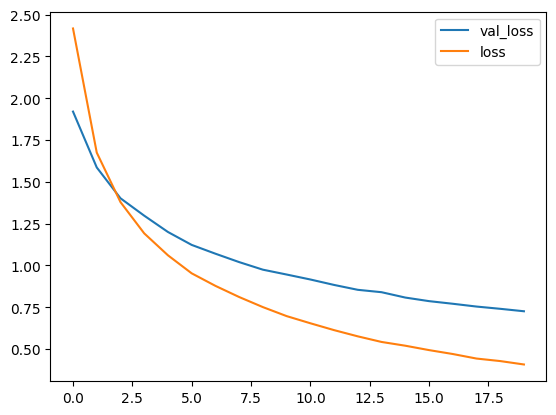

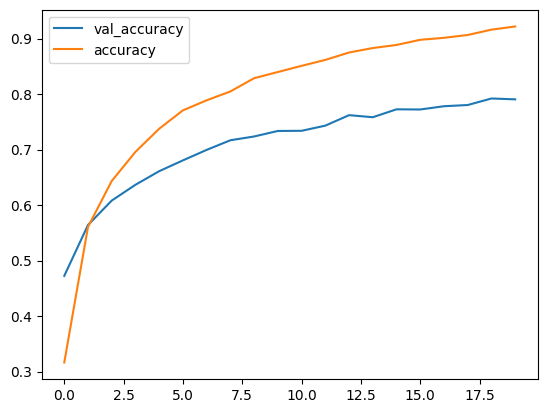

In [55]:
plt.plot(history.history['val_loss'], label='val_loss')
plt.plot(history.history['loss'], label='loss')
plt.legend()
plt.show()

plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.plot(history.history['accuracy'], label='accuracy')
plt.legend()
plt.show()

In [65]:
directory = '../models/history'
now = datetime.datetime.now()

formatted_date = now.strftime("%d-%m-%Y_%H.%M")

if not os.path.exists(directory):
    os.makedirs(directory)
    print("Directory created:", directory)
else:
    print("Directory already exists:", directory)


with open(f'{directory}/history-{formatted_date}.json', 'w') as f:
    history.history['lr'] = [float(lr) for lr in history.history['lr']]
    json.dump(history.history, f)

print(formatted_date)
model.save(f'../models/{formatted_date}_efficientNetB0')
print(f'save models at ../models/{formatted_date}_efficientNetB0')

Directory already exists: ../models/history
17-03-2023_16.39


INFO:tensorflow:Assets written to: ../models/17-03-2023_16.39_efficientNetB0\assets


INFO:tensorflow:Assets written to: ../models/17-03-2023_16.39_efficientNetB0\assets


save models at ../models/17-03-2023_16.39_efficientNetB0


In [2]:
model = load_model('../models/17-03-2023_16.39_efficientNetB0')
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_3 (Rescaling)        (None, 224, 224, 3)  0           ['input_4[0][0]']                
                                                                                                  
 normalization_3 (Normalization  (None, 224, 224, 3)  7          ['rescaling_3[0][0]']            
 )                                                                                                
                                                                                            

In [11]:
y_pred = model.predict(X_test)

101/101 [==============================] - 234s 2s/step


In [12]:
y_test_decode = encoder.categories_[0][y_test.argmax(axis=1)]

In [13]:
y_test.argmax(axis=1)

array([ 8, 25, 25, ..., 25, 27, 20], dtype=int64)

In [14]:
y_pred_decode = encoder.categories_[0][y_pred.argmax(axis=1)]

In [15]:
print(classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1),))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92       151
           1       0.94      0.94      0.94       112
           2       0.84      0.89      0.87       151
           3       0.94      0.99      0.97        98
           4       0.94      0.75      0.84        65
           5       0.95      0.84      0.89       125
           6       0.90      0.82      0.86       148
           7       0.96      0.99      0.97        73
           8       0.96      0.88      0.92       104
           9       0.84      0.91      0.88        82
          10       1.00      1.00      1.00        85
          11       0.81      0.94      0.87        88
          12       0.91      0.85      0.88       145
          13       0.78      0.93      0.85        61
          14       0.93      0.64      0.75       121
          15       0.93      0.87      0.90       111
          16       0.93      0.92      0.93       104
          17       0.94    

<Axes: >

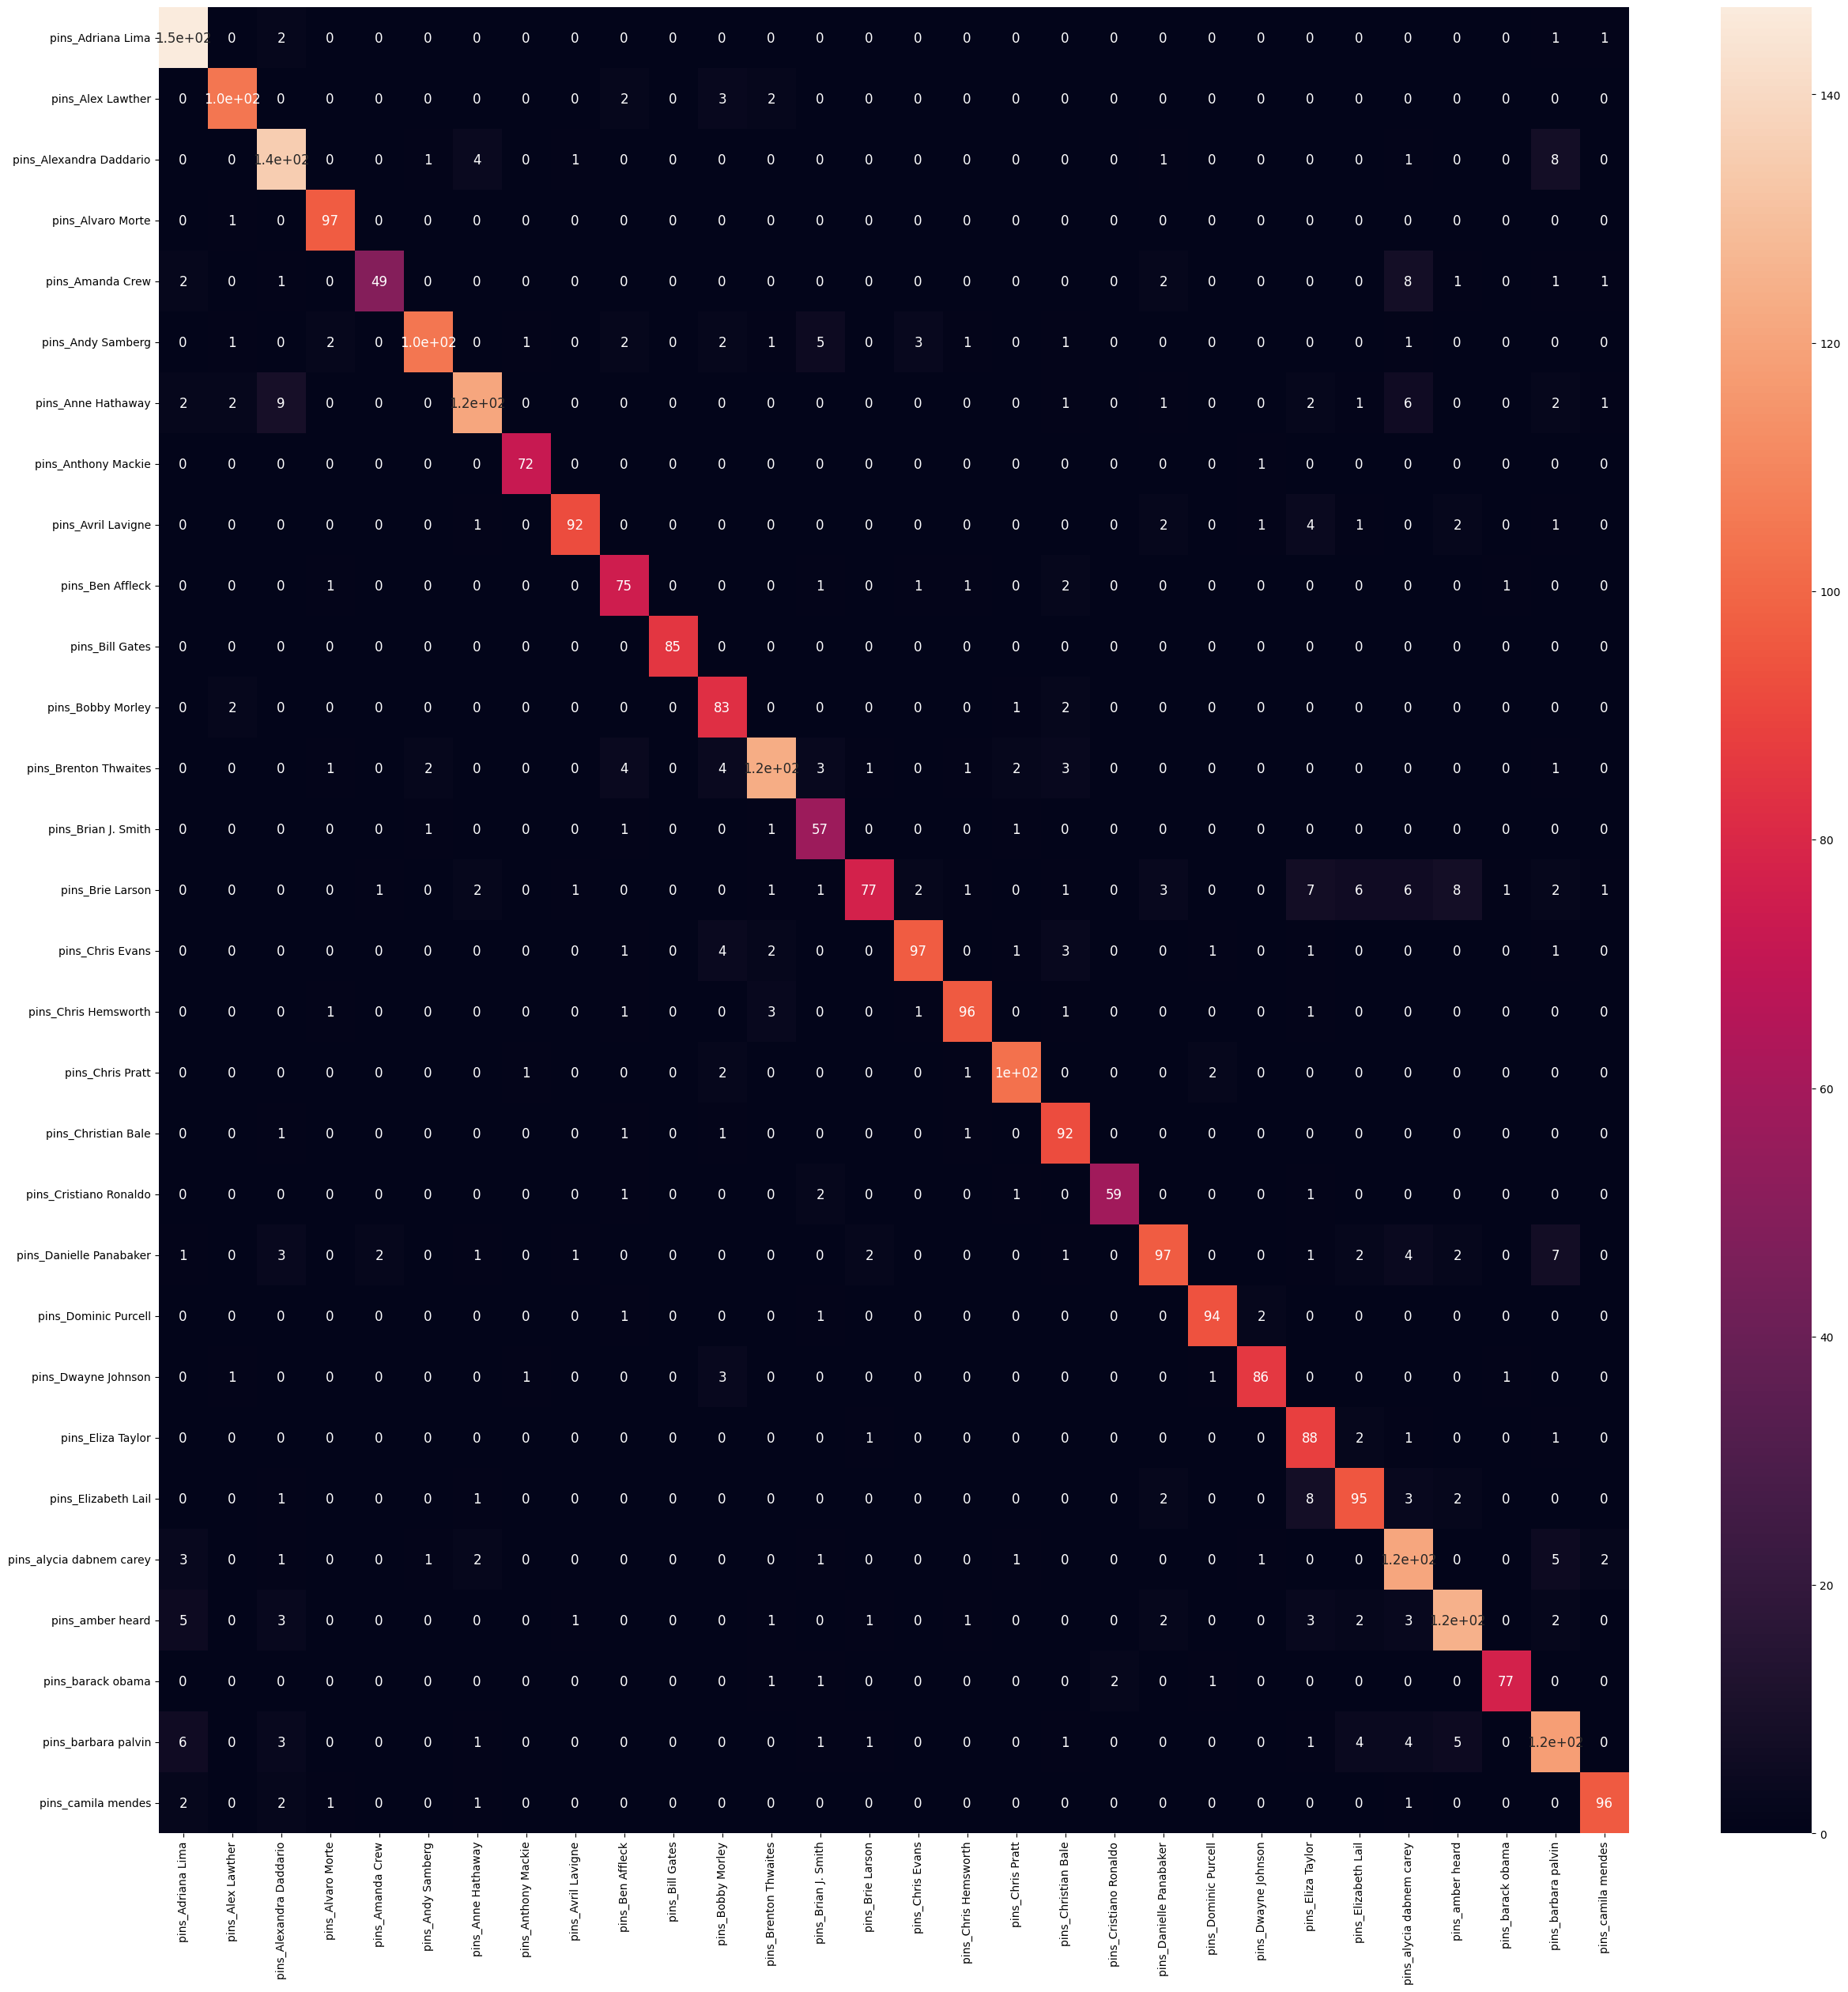

In [16]:
cm_labels = np.unique(y_test_decode)
cm_array = confusion_matrix(y_test_decode, y_pred_decode)
cm_array_df = pd.DataFrame(cm_array, index=cm_labels, columns=cm_labels)

fig, ax = plt.subplots(figsize=(30, 30))
sns.heatmap(cm_array_df, annot=True, annot_kws={"size": 12}) 

'e3fcceb95cdfda649c1989292e4fa576bf4cbb0f21b5809aac7bb7a3f836b7c1'

In [25]:
import hashlib

directory ='../data/processed/successful_test'

if not os.path.exists(directory):
    os.makedirs(directory)
    print(f'making directory: {directory}')
else:
    print(f'directory: {directory} already exists')

successful_test_img = X_test[y_pred_decode == y_test_decode]
successful_test_label = y_test_decode[y_pred_decode == y_test_decode]

for image, lbl in zip(successful_test_img, successful_test_label):
    if not os.path.exists(f'{directory}/{lbl}'):
        os.makedirs(f'{directory}/{lbl}')

    cv2.imwrite(f'{directory}/{lbl}/{lbl}_{hashlib.sha256(image).hexdigest()}.jpg', cv2.cvtColor(image, cv2.COLOR_RGB2BGR))
    

making directory: ../data/processed/successful_test


In [31]:
import hashlib

directory ='../data/processed/failed_test'

if not os.path.exists(directory):
    os.makedirs(directory)
    print(f'making directory: {directory}')
else:
    print(f'directory: {directory} already exists')

failed_test_img = X_test[y_pred_decode != y_test_decode]
failed_test_label = y_pred_decode[y_pred_decode != y_test_decode]
failed_test_actual_label = y_test_decode[y_pred_decode != y_test_decode]

for image, lbl, actual_lbl in zip(failed_test_img, failed_test_label, failed_test_actual_label):
    if not os.path.exists(f'{directory}/{lbl}'):
        os.makedirs(f'{directory}/{lbl}')

    cv2.imwrite(f'{directory}/{lbl}/{actual_lbl} {lbl}_{hashlib.sha256(image).hexdigest()}.jpg', cv2.cvtColor(image, cv2.COLOR_RGB2BGR))
    

making directory: ../data/processed/failed_test
